In [1]:
import PIL.Image
import cv2
import IPython.display
import time
from zumi.zumi import Zumi
from zumi.util.camera import Camera
from zumi.util.vision import Vision
from zumi.util.screen import Screen

zumi = Zumi()
screen = Screen()

#this will print the board firmware version number
print(zumi.board_firmware_version)

Starting Zumi 
Pi Zero I2C is available
Pi Zero is different.
Calibrating gyroscope now
Creating new offset file...
.
.
Zumi board detected
Compass detected
OLED Screen detected
Gyroscope & Accelerometer detected
1.2


In [2]:
#this is a new easy to use calibration method
#just an extra function to zumi.mpu.calibrate_MPU()
#zumi.gyro_calibrate()
zumi.calibrate_gyro()

Creating new offset file...
.
.


In [4]:
#try this on a zumi firmware 1.0
zumi.z_led_on()
#there should be protection

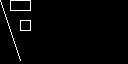

In [6]:
#these are the new draw methods 
#here we will make some rectangles
screen.draw_rect(10,0,20,10)
screen.draw_rect(20,20,10,10)
screen.draw_line(0,0,20,60)

#we will display the image on jupyter as well
IPython.display.display(screen.screen_image)
IPython.display.clear_output(wait=True)

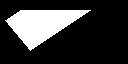

In [7]:
#will clear the previous drawing but not display anything
screen.clear_drawing()
#this will NOT CLEAR the screen.

#set of 4 points for the polygon (x,y)
points = [(30,50),(90,10),(20,10),(5,20)]
#will draw a polygon
screen.draw_polygon(points)

#display the image on jupyter as well
IPython.display.display(screen.screen_image)
IPython.display.clear_output(wait=True)

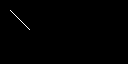

In [8]:
#will clear the previous drawing but not display anything
screen.clear_drawing()

#draw a bunch of points stacked on the same draw image
for i in range(20):
    #draw new point on screen
    screen.draw_point(10+i,10+i)
    
    #display on jupyter as well
    IPython.display.display(screen.screen_image)
    IPython.display.clear_output(wait=True)

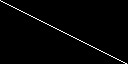

In [10]:
screen.clear_drawing()
#draws a line parameters (x1,y1,x2,y2) 
#which are 2 points that the line connect
screen.draw_line(0,0,128,64)


#display on jupyter as well
IPython.display.display(screen.screen_image)
IPython.display.clear_output(wait=True)

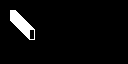

In [11]:
screen.clear_drawing()

for i in range(20):
    #this will both draw a rectangle and display it
    screen.draw_rect(10+i,10+i,5,10)
    
    #display on jupyter
    IPython.display.display(screen.screen_image)
    IPython.display.clear_output(wait=True)

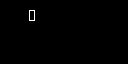

In [12]:
screen.clear_drawing()
for i in range(20):
    #this wipes away the drawing
    screen.clear_drawing()
    #this will both draw a rectangle and display it
    screen.draw_rect(10+i,10,5,10)
    IPython.display.display(screen.screen_image)
    IPython.display.clear_output(wait=True)

In [14]:
#clear out the drawing
screen.clear_drawing()

#(x,y, width, height) of the ellipse
screen.draw_ellipse(60,0,30,10)
screen.draw_ellipse(60,30,10,30)

In [17]:
screen.clear_drawing()

#draw a circle with no infill
#parameters (x,y,diameter/width,fill-in)
#x and y is the top left corner 
#of a box that bounds the circle
screen.draw_circle(10,0,20,fill_in=False)

In [18]:
screen.clear_drawing()

#draw a circle with infill
screen.draw_circle(10,0,20,fill_in=True)

In [19]:
screen.clear_drawing()
screen.draw_arc(0,0,20,20,0,180)
#x1,y1, x2,y2, starting angle, ending angle
#x1 and y1 are the top left corner
#x2 and y2 are the bottom left corner
#these are the corners of a box

In [61]:
screen.clear_drawing()
screen.draw_chord(0,0,20,20,0,180)
screen.draw_chord(30,30,50,50,0,270)
screen.draw_chord(60,30,100,50,0,360)

In [62]:
screen.clear_drawing()
for i in range(20):
    screen.draw_arc(0,0,20,20,0,180+8*i)

In [1]:
screen.clear_drawing()
#draws a triangle given 3 points (x,y)
screen.draw_triangle(10,20,30,40,10,40)

NameError: name 'screen' is not defined

In [64]:
import PIL.Image
import cv2
import IPython.display
import time
from zumi.zumi import Zumi
from zumi.util.camera import Camera
from zumi.util.vision import Vision
from zumi.util.screen import Screen

zumi = Zumi()
screen = Screen()
vision = Vision()

Starting Zumi 
Pi Zero I2C is available
Verified Pi Zero is the same
Gyroscope previously calibrated
Zumi board detected
Compass detected
OLED Screen detected
Gyroscope & Accelerometer detected


In [66]:
camera = Camera()

try:
    camera.start_camera()
    for i in range(20):
        image=camera.capture()
        gray = vision.convert_to_gray(image)
        data = vision.find_face(gray)
        if data is not None:
            print("found face")
        camera.show_image(gray)
        camera.clear_output()
finally:        
    camera.close()
    print("done")

Closing PiCamera
done


In [67]:

camera = Camera()

try:
    camera.start_camera()
    for i in range(20):
        image=camera.capture()
        gray = vision.convert_to_gray(image)
        data = vision.find_smile(gray)
        if data is not None:
            print("found smile")
        camera.show_image(gray)
        camera.clear_output()
finally:        
    camera.close()
    print("done")

Closing PiCamera
done


In [68]:
camera = Camera()

try:
    camera.start_camera()
    for i in range(40):
        image=camera.capture()
        data = vision.find_green_object(image)
        if data is not None:
            x = data[0]
            y = data[1]
            width = data[2]
            height = data[3]
        camera.show_image(image)
        camera.clear_output()
finally:        
    camera.close()
    print("done")

Closing PiCamera
done


In [69]:
for i in range(40):
    zumi.line_follow_step()
zumi.stop()